# Template Metodologia CRISP DM - Grupo 02 , Rappitenderos 🏍 🚀

Neste documento, centralizaremos nosso processo de produção utilizando a metodologia CRISP-DM (**C**ross **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining, que traduzido para o português significa Padrão Inter Industrial de Processos para Mineração de Dados), onde se encontrarão as principais etapas deste processo; Business Understanding (Entendimento do Negócio), Data Understanding (Entendimento dos dados), Data Preparation (Preparação dos Dados), Modeling (Modelagem), Evaluation (Avaliação) e Deployment (Implantação). 

Nos itens a seguir, seguem a organização tanto de código quanto de teoria por trás das nossas decisões.  

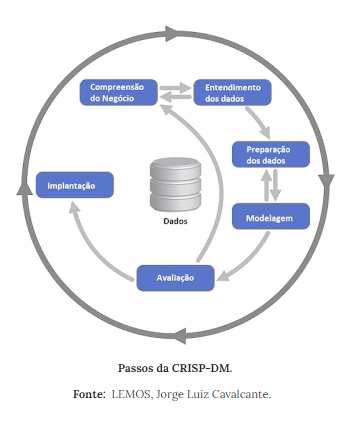

# Inicializando

Aqui estão presentes as livrarias e a montagem do drive necessária para executar os códigos subsequentes. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np 

!pip install catboost

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 13 kB/s 


# 1. Compreensão do Negócio

Nessa seção, serão informados o estudo do mercado na qual a Rappi está inserida. Como por exemplo, as forças e fraquezas internas da empresa, possíveis oportunidades de crescimento, possíveis riscos do protudo a ser produzido pelo aluno Inteli.

## Contexto da Industria (5 forças do Porter)

### O que são as 5 Forças de Porter?

As 5 Forças de Porter são, o poder de barganha que os fornecedores possuem (Os fornecedores possuem poucos concorrentes e podem manipular os seus preços), as ameaças externas do produto que a empresa comercializa (possíveis produtos substitutos), poder de barganha do cliente (Os clientes têm potencial de diminuir a margem de lucro da empresa), a entrada de novos concorrentes no ramo da indústria (qual a possibilidade de entrar novos players na indústria) e rivalidade entre concorrentes (A empresa analisada possui uma grande porção do mercado ou é um player menor que seus concorrentes? O quanto esses concorrentes conseguem influenciar as ações dessa empresa?)

### Cinco Forças de Porter no nosso projeto

Dado que o modelo preditivo a ser desenvolvido é destinado à Rappi, a análise de mercado em que a empresa está inserida foi feita utilizando o modelo das Cinco Forças de Porter, criado por Michael Porter. O modelo de análise de competição entre as empresas engloba cinco tópicos principais: rivalidade entre os concorrentes, ameaça de novos concorrentes, ameaça de produtos substitutos, poder de negociação dos clientes e poder de negociação dos fornecedores, todos aprofundados a seguir, respectivamente.


No setor de delivery, a rivalidade é alta por conta dos fortes concorrentes já consolidados no mercado, tanto de entrega de comida quanto outros produtos, como compras de supermercado, farmácia, etc. Apesar da empresa dispor de tecnologia assim como seus competidores, a tarefa de captar parceiros de negócio (entregadores, restaurantes, farmácias e supermercados) não é tão exitosa quanto a de seus concorrentes, criando um cenário de concorrência alta. 


Já o cenário de entrada de novos concorrentes é bastante chamativo por ser um setor altamente lucrativo e com espaço para inovações. Porém, por conta da rivalidade elevada já mencionada, competidores já consolidados no mercado dificultam bastante a entrada.


Ao mesmo tempo que a utilização de aplicativos de delivery é um substituto para a ida do cliente às lojas físicas, aplicativos de comunicação também podem representar um meio substituto para comunicação remota restaurante cliente, como já é observado atualmente, principalmente em cidades não tão populosas, sem serviços como iFood e Rappi. Um dos maiores exemplos é o Whatsapp, aplicativo de mensagens utilizado em larga escala no Brasil.


Apesar da informação do perfil dos clientes da Rappi não ser aberta ao público, é possível realizar uma análise e apontamentos das características mais generalistas de seus clientes. Pessoas que prezam pela praticidade de recebimento de produtos em casa e pela economia de tempo, além de terem poder de compra e disposição para gastos do gênero são o principal público do aplicativo. Porém, para uma conquista e retenção mais eficaz de usuários, a empresa deve deixar claro seu diferencial das múltiplas opções de produtos dentro do app, caso contrário seus clientes tem certo “poder de negociação” por conseguir facilmente migrar de um serviço de delivery para outro.


Finalmente, os principais fornecedores para esse modelo de negócio são restaurantes, farmácias e mercados (para produtos comercializados) e também o serviço de entregas prestados por terceiros. Como a análise de Porter diz, o aumento do poder de negociação dos fornecedores causa uma diminuição na lucratividade da empresa, o que pode ser observado atualmente com a rotatividade alta dos entregadores, que demanda maior incentivo por parte da Rappi para mantê-los.




###  Principais players, tendências e modelo de negócios

Por representar um cenário de mar vermelho, o mercado de vendas online de produtos consumíveis, principalmente alimentos, tem grandes nomes espalhados pelo globo. No Brasil, o principal nome e dono de mais de 80% do market share é a empresa iFood, lançada em 2011. Por outro lado, considerando a América Latina (excluindo o Brasil), o contexto muda e Rappi entra em cena com mais de 60% dos clientes de aplicativos do tipo, tendo o serviço do Uber Eats como seu concorrente em potencial, apesar de não representar grande ameaça por não possuir grande clientela. Já para compras de supermercado online, outro player também entra em jogo, o Cornershop, também da rede Uber. O serviço não oferece entrega de restaurantes ou farmácias e possui um sistema de delivery bastante semelhante a de seus competidores, porém não representa uma ameaça por possuir baixo índice de market share. 


Ao falar dos principais players do ramo, todos tendem a manter um avanço tecnológico crescente para sempre melhorar a experiência de seus usuários e fornecedores. Além de seus sistemas internos e o próprio aplicativo, inteligências artificiais têm grande potencial para extração de conhecimento a partir da análise dos dados coletados em larga escala. A tecnologia pode ser utilizada também para melhor atendimento ao cliente, visto que negócios totalmente online tendem a acumular numerosas reclamações. Por fim, uma abordagem levando em conta os princípios ESG (Environmental, Social and Governance) podem trazer maior lucratividade, visto que a corporação trabalhará em cima de assuntos que vão além do seu papel proposto.



Adentrando o modelo de negócios da Rappi, vê-se uma plataforma digital que almeja conectar estabelecimentos aos clientes, fazendo a ponte por meio das entregas com motoristas próprios da Rappi. Esse modelo nasceu com a finalidade de ser a referência da compra online de qualquer produto na América Latina, em que a compra deve chegar o mais rápido possível nas mãos dos clientes no conforto de seus lares. Ou seja, o diferencial da Rappi é a abrangência de sua cobertura, envolvendo não só o serviço de delivery de alimentos, mas também a entrega de itens de farmácia, locação de carros, reserva de hotéis, voos e muito mais!


## Analise SWOT

### O que é a Análise SWOT?
A Análise SWOT consiste em Strength (Forças internas da empresa - Os pontos positivos da empresa em si), Weakness (Fraquezas internas da empresa - Os pontos negativos da empresa em si), Opportunities (Oportunidades externas da empresa, que podem ajudar no crescimento dela) e Threats (Possíveis riscos externos da empresa, como concorrentes consolidados e diminuição da demanda de determinado mercado)


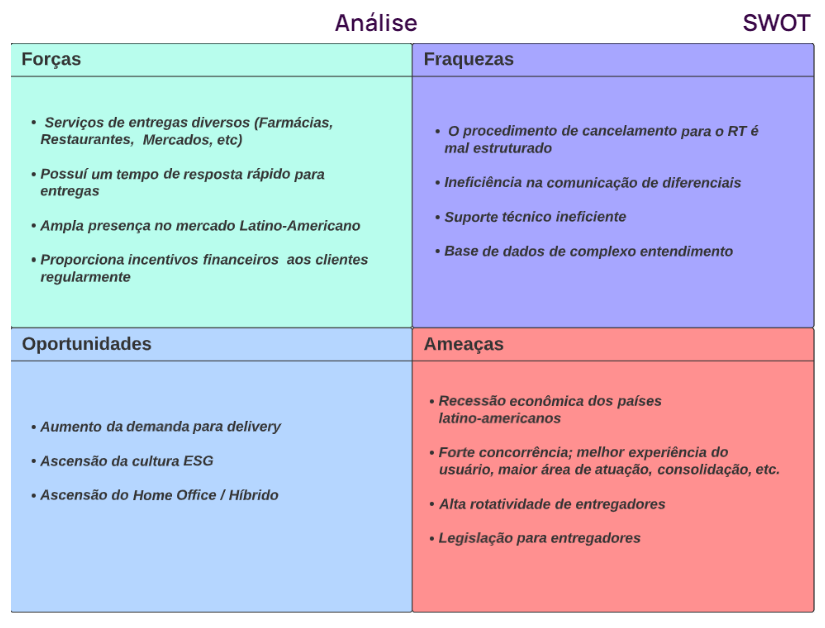

## Descrição da Solução

###  O problema a ser solucionado 

Não existe um vínculo empregatício entre a Rappi e seus entregadores, logo, não há nenhuma razão para os entregadores questionarem o abandono do uso do aplicativo. Estas saídas influenciam na taxa de rotatividade (“Churn Rate”, em inglês) da empresa, visto que sem os entregadores, não há como o aplicativo oferecer seus diversos serviços ao usuário final e a empresa não gera receita; O problema, então, é manter os entregadores satisfeitos ao utilizar a plataforma. 


Este é um problema difícil de enfrentar, com diversas maneiras possíveis de ser abordado, porém, toda solução começa com a compreensão; Os problemas dos entregadores são causados por agentes externos ou pela própria empresa? A comunicação entre eles e a empresa está trazendo resultados tangíveis para serem utilizados nesta compreensão? O que é necessário para a empresa conseguir diminuir a taxa de rotatividade? Responder estas questões é o objetivo de nosso trabalho; o problema a ser resolvido. 


### Como será resolvido o problema?

A partir do entendimento e da preparação dos dados, utilizaremos um sistema de predição (Uma inteligência artificial supervisionada) para ranquear os RTs de forma que seja possível a visualização da quantidade de entregadores que tem a maior chance de dar churn. Nosso objetivo é deixar, de maneira clara, quem são aqueles em situação mais frágil com relação ao aplicativo e tendem a deixa-lo.

## Value Proposition Canvas

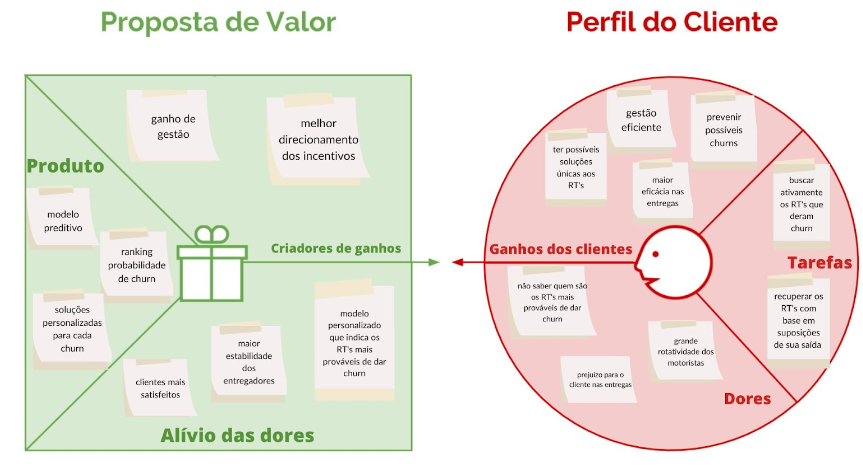

## Matriz de Riscos

Riscos e oportunidades do projeto, utilizando os alunos envolvidos em sua construção como referência

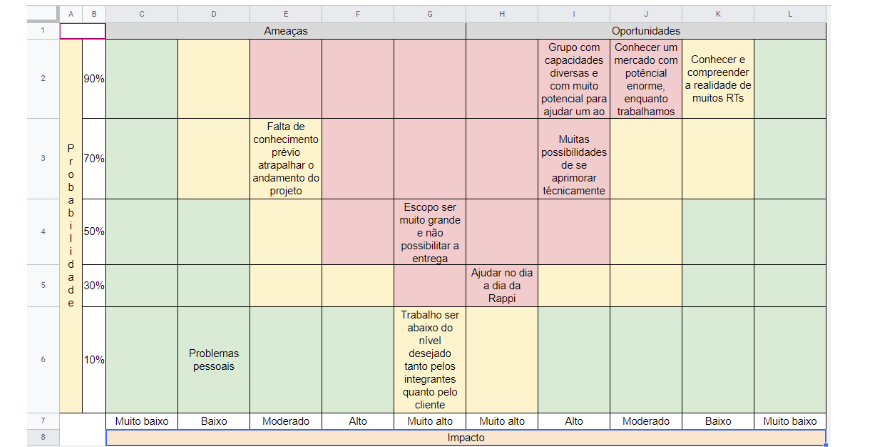

# 2. Entendimento dos Dados

## O que é?

Após termos compreendido o negócio e como ele funciona, podemos, então, listar todos os dados que possuimos e, através das conclusões obtidas na compreensão do negócio, selecionar quais os dados possuem maior relevância para a solução. 

Neste contexto, a relevância pode ser definida como dados que revelam problemas, soluções e/ou tendências do negócio que contribuiriam para a predição final. 

## Dados

Aqui, estão listados todos os dados que possuímos e explicações de como funcionam:

### Incidentes_Regras RT

In [ ]:
import pandas as pd

df_incidentes = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/Incidentes_Regras RT.csv', dtype={'INCIDENT_ID':'int32', 'STOREKEEPER_ID':'int32', 'PUNISHMENT_MINUTES':'int32', 'ORDER_ID': 'float32'})
df_incidentes.head()

,DATE,NAME,INCIDENT_ID,STOREKEEPER_ID,PUNISHMENT_MINUTES,PUNISHMENT_TYPE,DISCIPLINE_RULE_BUCKET,CATEGORY_RULE,ORDER_ID
0,2022-06-29,92. Liberación (Live),7834134,1089595,15,temporary_block,release_live,Discipline,148929248.0
1,2021-10-11,75. Reporte Manual Casos MUITO GRAVES - Bloque...,6262418,1379883,21600000,permanent_block,Manual,Manual,117857600.0
2,2022-06-15,92. Liberación (Live),7729462,1445261,300,temporary_block,release_live,Discipline,147335520.0
3,2021-08-29,Liberacion CMS (live) - 60 min\t,6111307,246044,0,warning,Discipline,Discipline,112916272.0
4,2022-01-08,92. Liberación (Live),6812562,1392515,0,warning,release_live,Discipline,128363328.0


In [ ]:
df_incidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405601 entries, 0 to 2405600
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DATE                    object 
 1   NAME                    object 
 2   INCIDENT_ID             int32  
 3   STOREKEEPER_ID          int32  
 4   PUNISHMENT_MINUTES      int32  
 5   PUNISHMENT_TYPE         object 
 6   DISCIPLINE_RULE_BUCKET  object 
 7   CATEGORY_RULE           object 
 8   ORDER_ID                float32
dtypes: float32(1), int32(3), object(5)
memory usage: 128.5+ MB


**Contexto:**

É possível concluir que essa tabela é um método de controle das punições; ou seja; ela mostra pedidos que tiveram problemas, qual sua punição, quem é o infrator, e qual a consequência dessa infração.

**Descrição dos Dados:**

* **DATE** = Data da infração
* **NAME** = Identificação da infração por meio de ID e nome detalhando qual o significado do mesmo.
* **INCIDENT_ID** = Identificação do Incidente
* **STOREKEEPER_ID** = Identificação do RT (Infrator)
* **PUNISHMENT_MINUTES** = Tempo de punição (em minutos)
* **PUNISHMENT_TYPE** = Método de punição
* **DISCIPLINE_RULE_BUCKET** = Indicador interno da Rappi, justifica detalhadamente a razão da punição 
* **CATEGORY_RULE** = Indicador interno da Rappi, justifica de maneira mais generalizada a razão da punição
* **ORDER_ID** = Identificação do Pedido

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_incidentes.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_incidentes.head()

,DATE,NAME,INCIDENT_ID,ID,PUNISHMENT_MINUTES,PUNISHMENT_TYPE,DISCIPLINE_RULE_BUCKET,CATEGORY_RULE,ORDER_ID
0,2022-06-29,92. Liberación (Live),7834134,1089595,15,temporary_block,release_live,Discipline,148929248
1,2021-10-11,75. Reporte Manual Casos MUITO GRAVES - Bloque...,6262418,1379883,21600000,permanent_block,Manual,Manual,117857600
2,2022-06-15,92. Liberación (Live),7729462,1445261,300,temporary_block,release_live,Discipline,147335520
3,2021-08-29,Liberacion CMS (live) - 60 min\t,6111307,246044,0,warning,Discipline,Discipline,112916272
4,2022-01-08,92. Liberación (Live),6812562,1392515,0,warning,release_live,Discipline,128363328


### Ordens Done e Cancel

In [ ]:
import pandas as pd

df_orders = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/Ordens Done e Cancel.csv', dtype={'ORDERS_DONE':'int32', 'STOREKEEPER_ID':'int32', 'ORDERS_CANCEL':'int32', 'CANCELS_OPS_RT': 'int32'})
df_orders.head()

,STOREKEEPER_ID,ORDERS_DONE,ORDERS_CANCEL,CANCELS_OPS_RT
0,266155,10356,61,0
1,166971,10272,112,4
2,2144,9915,123,0
3,242848,9833,28,8
4,70511,9814,229,64


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653166 entries, 0 to 653165
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   STOREKEEPER_ID  653166 non-null  int32
 1   ORDERS_DONE     653166 non-null  int32
 2   ORDERS_CANCEL   653166 non-null  int32
 3   CANCELS_OPS_RT  653166 non-null  int32
dtypes: int32(4)
memory usage: 10.0 MB


**Contexto:**

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle dos pedidos que são atendidos e cancelados, tanto por clientes quanto pelos RTS.

**Descrição dos dados:**

* **STOREKEEPER_ID** = ID do entregador.
* **ORDERS_DONE** = Número de pedidos realizados.
* **ORDERS_CANCEL** = Número de pedidos cancelados.
* **CANCEL_OPS_RT** = Número de pedidos cancelados manualmente pelo time de operação.

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_orders.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_orders

,ID,ORDERS_DONE,ORDERS_CANCEL,CANCELS_OPS_RT
0,266155,10356,61,0
1,166971,10272,112,4
2,2144,9915,123,0
3,242848,9833,28,8
4,70511,9814,229,64
...,...,...,...,...
653161,403185,0,1,0
653162,593868,0,3,0
653163,184569,0,1,0
653164,157284,0,1,0


### Product Return

In [ ]:
import pandas as pd

df_product = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/Product return.csv', dtype={'ID_ENTREGADOR':'int32', 'ORDER_ID':'int32', 'PRODUCT_RETURNS':'float32', 'GMV':'float32', 'STORE_ID':'int32'})
df_product

,ID_ENTREGADOR,LEVEL_NAME,MODAL,CITY,CREATED_AT,ORDER_ID,PRODUCT_RETURNS,VERTICAL_SUB_GROUP,COUNT_TO_GMV,GMV,STORE_ID
0,1522020,rookie,bicycle,Grande São Paulo,2022-06-30T01:20:28-05:00,148999124,-39.707001,PHARMACY,False,0.000000,900621879
1,625622,diamond,bicycle,Grande São Paulo,2022-06-29T23:16:11-05:00,148997023,-12.455000,PHARMACY,True,16.813482,900170876
2,841749,silver,bicycle,Natal,2022-06-29T22:07:59-05:00,148992350,-7.702000,LIQUOR,True,3.017977,900269581
3,1452571,diamond,bicycle,Rio de Janeiro,2022-06-29T21:32:35-05:00,148988385,-11.354000,LIQUOR,True,9.865169,900028478
4,556293,bronze,bicycle,Rio de Janeiro,2022-06-29T20:58:59-05:00,148983574,-8.084000,SUPER,True,13.364045,900014202
...,...,...,...,...,...,...,...,...,...,...,...
41530,1189428,bronze,motorbike,Goiânia,2021-06-01T08:14:28-05:00,102433042,-24.035999,EXPRESS,True,32.741573,900129286
41531,481064,bronze,motorbike,Fortaleza,2021-06-01T07:45:03-05:00,102432123,-10.573000,EXPRESS,True,16.325842,900154480
41532,630475,silver,car,Campinas,2021-06-01T07:14:04-05:00,102431522,-21.406000,SUPER,True,7.152809,900130442
41533,1156331,danger,car,Grande São Paulo,2021-06-01T05:06:05-05:00,102430994,-3.887000,PHARMACY,True,12.889888,900170946


Explicação:

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de retorno dos produtos de pedidos que foram cancelados.

Descrição dos dados:

* **ID_ENTREGADOR** = Número de identificação do entregador.
* **LEVEL_NAME** = Nível do entregador.
* **MODAL** = Meio de locomoção.
* **CITY** = Cidade de atuação.
* **CREATED_AT** = Data de criação do registro
* **ORDER_ID** = ID (número de identificação) do pedido.
* **PRODUCT_RETURNS** = Valor a ser devolvido pelo entregador.
* **VERTICAL_SUB_GROUP** = Categoria do pedido (restaurante, mercado, farmácia, pet, etc).
* **COUNT_TO_GMV** = Abater do GMV.
* **GMV** = Gross Merchandise Value é o valor total dos itens do pedido
* **STORE_ID** = ID (número de identificação) da loja.

#### Padronização de nomes de coluna

*   **ID_ENTREGADOR** = ID

In [ ]:
df_product.rename({'ID_ENTREGADOR': 'ID'}, axis=1, inplace=True)
df_product

,ID,LEVEL_NAME,MODAL,CITY,CREATED_AT,ORDER_ID,PRODUCT_RETURNS,VERTICAL_SUB_GROUP,COUNT_TO_GMV,GMV,STORE_ID
0,1522020,rookie,bicycle,Grande São Paulo,2022-06-30T01:20:28-05:00,148999124,-39.707001,PHARMACY,False,0.000000,900621879
1,625622,diamond,bicycle,Grande São Paulo,2022-06-29T23:16:11-05:00,148997023,-12.455000,PHARMACY,True,16.813482,900170876
2,841749,silver,bicycle,Natal,2022-06-29T22:07:59-05:00,148992350,-7.702000,LIQUOR,True,3.017977,900269581
3,1452571,diamond,bicycle,Rio de Janeiro,2022-06-29T21:32:35-05:00,148988385,-11.354000,LIQUOR,True,9.865169,900028478
4,556293,bronze,bicycle,Rio de Janeiro,2022-06-29T20:58:59-05:00,148983574,-8.084000,SUPER,True,13.364045,900014202
...,...,...,...,...,...,...,...,...,...,...,...
41530,1189428,bronze,motorbike,Goiânia,2021-06-01T08:14:28-05:00,102433042,-24.035999,EXPRESS,True,32.741573,900129286
41531,481064,bronze,motorbike,Fortaleza,2021-06-01T07:45:03-05:00,102432123,-10.573000,EXPRESS,True,16.325842,900154480
41532,630475,silver,car,Campinas,2021-06-01T07:14:04-05:00,102431522,-21.406000,SUPER,True,7.152809,900130442
41533,1156331,danger,car,Grande São Paulo,2021-06-01T05:06:05-05:00,102430994,-3.887000,PHARMACY,True,12.889888,900170946


### Attendance rate 

In [ ]:
import pandas as pd

df_attendance = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/attendance rate.csv')
df_attendance.head()

,STOREKEEPER_ID,ACCEPTANCE_RATE
0,907442.0,0.666102
1,1393441.0,0.556538
2,1061798.0,0.777838
3,103460.0,0.160980
4,1259998.0,0.856102


Explicação:

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle da taxa de aceitação dos pedidos.

Descrição dos dados:

* Storekeeper_ID = ID (número de identificação) do entregador.
* Acceptance_Rate = Porcentagem de pedidos aceitos pelo entregador com relação ao total de pedidos recebidos.

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_attendance.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_attendance.head()

,ID,ACCEPTANCE_RATE
0,907442.0,0.666102
1,1393441.0,0.556538
2,1061798.0,0.777838
3,103460.0,0.160980
4,1259998.0,0.856102


### Comp Defects

In [ ]:
import pandas as pd

df_defects = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/comp defects.csv', dtype={'GMV_TOTAL':'float32', 'STOREKEEPER_ID':'float32', 'COMPENSATIONS':'float32', 'DEFECT_COMPENSATIONS': 'float32', 'ORDERS': 'int32', 'LEVEL_ID': 'float32'})
df_defects.head()

,STOREKEEPER_ID,WEEK,CITY,LEVEL_ID,LEVEL_NAME,ORDERS,GMV_TOTAL,COMPENSATIONS,DEFECT_COMPENSATIONS,DEFECT_ORDER
0,1009854.0,2021-07-17,Grande São Paulo,3.0,bronze,5,422.480011,11.173,108019816.0,108019818.0
1,822496.0,2022-01-19,Grande São Paulo,3.0,bronze,5,947.919983,1.751,129571768.0,129571770.0
2,1404796.0,2022-05-23,Grande São Paulo,1.0,diamond,3,467.779999,7.681,144664672.0,144664666.0
3,33564.0,2022-04-15,Grande São Paulo,1.0,diamond,26,2655.899902,0.634,140114784.0,140114780.0
4,1477795.0,2022-04-24,Grande São Paulo,4.0,danger,25,4689.839844,8.724,141097168.0,141097167.0


Explicação:

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de reclamações de pedidos incompletos, faltantes, errados, etc.

Descrição dos dados:

* Storekeeper_ID = ID (número de identificação) do entregador.
* Week = Semena em referência ao acontecimento.
* City = Cidade de atuação.
* Level_ID = ID (número de identificação) do nível do entregador.
* Level_Name = Nome do nível do entregador.
* Orders = Número de pedidos que deram algum problema.
* GMV_Total = Total de custos pagos pela Rappi para a loja.
* Compensations = Valor total devolvido para o usuário.
* Defect_Compensations/ Defect_Order = Ordens/ ID do pedido.

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_defects.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_defects.head()

,ID,WEEK,CITY,LEVEL_ID,LEVEL_NAME,ORDERS,GMV_TOTAL,COMPENSATIONS,DEFECT_COMPENSATIONS,DEFECT_ORDER
0,1009854.0,2021-07-17,Grande São Paulo,3.0,bronze,5,422.480011,11.173,108019816.0,108019818.0
1,822496.0,2022-01-19,Grande São Paulo,3.0,bronze,5,947.919983,1.751,129571768.0,129571770.0
2,1404796.0,2022-05-23,Grande São Paulo,1.0,diamond,3,467.779999,7.681,144664672.0,144664666.0
3,33564.0,2022-04-15,Grande São Paulo,1.0,diamond,26,2655.899902,0.634,140114784.0,140114780.0
4,1477795.0,2022-04-24,Grande São Paulo,4.0,danger,25,4689.839844,8.724,141097168.0,141097167.0


### Criação Contas Churn

In [ ]:
import pandas as pd

df_churn = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/criacao contas churn-002.csv')
df_churn.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,1286316,Adailton,M,Grande São Paulo,2021-06-07,motorbike,True,bronze,2022-01-16T23:27:35Z
1,1110698,Adriano Floriano Da Silva,M,Recife,2021-02-11,bicycle,True,bronze,2021-07-15T11:16:04Z
2,284886,Bruno,M,Grande São Paulo,2019-07-03,motorbike,False,bronze,2021-07-07T12:33:21Z
3,1036587,Vinicius,M,Paulínia,2020-12-21,motorbike,True,bronze,2021-09-12T16:45:27Z
4,106854,Eduardo,M,Grande São Paulo,2019-02-11,motorbike,True,bronze,2021-11-14T13:45:57Z


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32568384 entries, 0 to 32568383
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   FIRST_NAME            object
 2   GENDER                object
 3   CITY                  object
 4   SK.CREATED_AT::DATE   object
 5   TRANSPORT_MEDIA_TYPE  object
 6   CARTAO                object
 7   LEVEL_NAME            object
 8   FECHA_ULT             object
dtypes: int64(1), object(8)
memory usage: 2.2+ GB


Explicação:

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de contas de entregadores que deram churn.

Descrição dos dados:

* **ID** = Número de identificação do entregador.
* **FIRST_NAME** = Primeiro nome do entregador.
* **GENDER** = Gênero do entregador (M = masculino).
* **CITY** = Cidade do entregador.
* **SK.CREATED_AT::DATE** = Data de criação do cadastro do entregador.
* **TRANSPORT_MEDIA_TYPE** = Transporte utilizado pelo RT.
* **CARTÃO** = Tem ou não tem um cartão. Esse é um cartão pré-pago que o entregador pode ter para fazer as compras. O dinheiro é liberado na hora do pagamento.
* **LEVEL_NAME** = Nível do entregador.
* **FECHA_ULT** = Última interação do entregador com o aplicativo.

### Earnings

In [ ]:
import pandas as pd
df_earnings = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/earnings.csv')
df_earnings.head()

,MONTH,STOREKEEPER_ID,EARNINGS,TIPS
0,2021-07-01T00:00:00Z,33161,1047.82,316.0
1,2021-07-01T00:00:00Z,33189,916.58,304.0
2,2021-07-01T00:00:00Z,33194,3076.38,552.0
3,2021-07-01T00:00:00Z,33207,160.42,44.0
4,2021-07-01T00:00:00Z,33213,268.63,59.0


In [ ]:
df_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566099 entries, 0 to 566098
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MONTH           566099 non-null  object 
 1   STOREKEEPER_ID  566099 non-null  int64  
 2   EARNINGS        566099 non-null  float64
 3   TIPS            566099 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.3+ MB


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de ganhos/receita de cada entregador.

**Descrição dos dados:**

* **MONTH** = Data do mês em que os dados foram extraídos
* **STOREKEEPER_ID** = ID (número de identificação) do comerciante.
* **EARNINGS** = Ganhos/dinheiro recebido por cada RT naquele mês
* **TIPS** = Gorjetas de cada entregador naquele mês

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_earnings.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_earnings.head()

,MONTH,ID,EARNINGS,TIPS
0,2021-07-01T00:00:00Z,33161,1047.82,316.0
1,2021-07-01T00:00:00Z,33189,916.58,304.0
2,2021-07-01T00:00:00Z,33194,3076.38,552.0
3,2021-07-01T00:00:00Z,33207,160.42,44.0
4,2021-07-01T00:00:00Z,33213,268.63,59.0


### Infos Gerais

In [ ]:
import pandas as pd
df_gerais = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/infos gerais.csv')
df_gerais.head()

,ID,NOME,SOBRENOME,GENERO,DATA_NASCIMENTO,CIDADE,IS_ACTIVE,TRANSPORTE,AUTO_ACEITE,COUNT_ORDERS_LAST_7D,...,ULTIMO_PEDIDO,COUNT_ORDERS_RESTAURANTES,COUNT_ORDERS_MERCADO,COUNT_ORDERS_FARMACIA,COUNT_ORDERS_EXPRESS,COUNT_ORDERS_ECOMMERCE,COUNT_ORDERS_ANTOJO,FRETE_MEDIO,COOKING_TIME_MEDIO,ITENS_MEDIO
0,1561246,Wilton Jhonne,Da Silva Abreu,M,1988-04-21,Sao Paulo,True,motorbike,True,1,...,2022-08-01T00:00:00Z,1,0,0,0,0,0,62.255500,10.000000,1.00
1,1561210,Dennis Leonardo,Pereira Santos,M,1998-06-28,Grande São Paulo,True,motorbike,True,7,...,2022-08-01T00:00:00Z,6,1,0,0,0,0,43.444714,23.142857,3.00
2,1561205,Thavillo Teles,Balviano De Olivetra,M,1997-09-25,Natal,True,motorbike,True,2,...,2022-08-01T00:00:00Z,1,1,0,0,0,0,42.230500,4.500000,3.50
3,1561173,Evellyn Dos,Santos Massal,F,1994-07-21,Grande São Paulo,True,motorbike,True,4,...,2022-08-01T00:00:00Z,4,0,0,0,0,0,47.236750,7.250000,1.25
4,1561132,Ewerlyn Vanessa,Dos Santos Borges,F,1999-06-15,Campinas,True,motorbike,False,4,...,2022-08-01T00:00:00Z,1,0,0,1,0,0,32.774250,2.000000,4.50


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de informações gerais de cada entregador.

**Descrição dos dados:**

* **ID** = Número de identificação do entregador.
* **NOME** = Nome do entregador.
* **SOBRENOME** = Sobrenome do entregador.
* **GENERO** = Gênero do entregador (M: masculino; F: feminino).
* **DATA_NASCIMENTO** = Data de nascimento do entregador.
* **CIDADE** = Cidade do entregador.
* **IS_ACTIVE** = Entregador ativo ou não.
* **TRANSPORTE** = Tipo de transporte utilizado pelo RT.
* **AUTO_ACEITO** = Modo de aceitação dos pedidos automático.
* **COUNT_ORDERS_LAST_7D** = Contagem de pedidos nos últimos 7 dias.
* **ULTIMO_PEDIDO** = Data do último pedido.
* **COUNT_ORDERS_RESTAURANTES** = Contagem dos últimos restaurantes atendidos.
* **COUNT_ORDERS_MERCADO** = Contagem dos últimos mercados atendidos.
* **COUNT_ORDERS_FARMACIA** = Contagem das últimas farmácias atendidas.
* **COUNT_ORDERS_EXPRESS** = Contagem dos últimos pedidos express.
* **COUNT_ORDERS_ECOMMERCE** = Contegem dos últimos pedidos de ecommerce atendidos.
* **COUNT_ORDERS_ANTOJO** = ???
* **FRETE_MEDIO** = Número do frete.
* **COOKING_TIME_MEDIO** = Tempo médio de preparo de cada pedido.
* **ITENS_MEDIO** = Número médio de itens nos pedidos.

### Supply (Old)

In [ ]:
import pandas as pd
df_supply_old = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/supply.csv')
df_supply_old.head()

,CITY,DATE,WEEK,CREATED_CARD,STOREKEEPER_ID,LEVEL_NAME_2,HAVE_CARD,TRANSPORT_MEDIA_TYPE,NUM_ORDERS,SUPPLY_HOURS
0,Grande São Paulo,2022-07-26,2022-07-25,2020-07-06,794243,diamond,1,bicycle,13.0,9.313611
1,Grande São Paulo,2022-07-26,2022-07-25,NaN,1000778,diamond,0,bicycle,9.0,11.497500
2,Rio de Janeiro,2022-07-26,2022-07-25,2022-04-01,117036,diamond,1,bicycle,9.0,16.656111
3,Rio de Janeiro,2022-07-26,2022-07-25,2022-05-12,1489979,diamond,1,bicycle,1.0,10.286667
4,Grande São Paulo,2022-07-26,2022-07-25,2022-03-28,867378,diamond,1,motorbike,3.0,3.426944


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela de pedidos do entregador pelo período de tempo em que ele ficou conectado

**Descrição dos dados:**

* **CITY** = Cidade do entregador.
* **DATE** = Dia em que os dados foram extraídos
* **WEEK** = Semana em que os dados foram extraídos (Dia correspondente ao domingo) 
* **CREATED_CARD** = Data de criação do cartão (Caso NaN, o entregador nunca criou o cartão)
* **STOREKEEPER_ID** = ID (número de identificação) do entregador.
* **LEVEL_NAME_2** = Nível do entregador de forma nominal
* **HAVE_CARD** = Tem ou não tem o cartão (Caso 0, a mesma linha na coluna "CREATED_CARD" estará preenchida como NaN)
* **TRANSPORT_MEDIA_TYPE** = Carro, Bicicleta ou Moto; Método de transporte do entregador.
* **NUM_ORDERS** = Número de pedidos atendidos pelo entregador nesse dia. 
* **SUPPLY_HOURS** = Tempo em horas em que o entregador ficou conectado nesse dia/ período.

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_supply_old.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_supply_old.head()

,CITY,DATE,WEEK,CREATED_CARD,ID,LEVEL_NAME_2,HAVE_CARD,TRANSPORT_MEDIA_TYPE,NUM_ORDERS,SUPPLY_HOURS
0,Grande São Paulo,2022-07-26,2022-07-25,2020-07-06,794243,diamond,1,bicycle,13.0,9.313611
1,Grande São Paulo,2022-07-26,2022-07-25,NaN,1000778,diamond,0,bicycle,9.0,11.497500
2,Rio de Janeiro,2022-07-26,2022-07-25,2022-04-01,117036,diamond,1,bicycle,9.0,16.656111
3,Rio de Janeiro,2022-07-26,2022-07-25,2022-05-12,1489979,diamond,1,bicycle,1.0,10.286667
4,Grande São Paulo,2022-07-26,2022-07-25,2022-03-28,867378,diamond,1,motorbike,3.0,3.426944


### Supply (New)

In [ ]:
import pandas as pd
df_supply = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/new_supply.csv')
df_supply.head()

,CITY,STOREKEEPER_ID,VEHICLE_TAG,DATE,HOURS_CONNECTED,ORDERS
0,Fortaleza,937297,car,2022-07-13,5.645278,3
1,Rio de Janeiro,1544960,car,2022-07-07,5.400000,0
2,Grande São Paulo,139208,motorbike,2022-07-12,3.193333,2
3,Rio de Janeiro,1513587,motorbike,2022-07-06,2.316944,0
4,Grande São Paulo,1547144,motorbike,2022-07-12,5.736111,7


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela de pedidos do entregador pelo período de tempo em que ele ficou conectado

**Descrição dos dados:**

* **CITY** = Cidade do entregador.
* **STOREKEEPER_ID** = ID do entregador. 
* **VEHICLE_TAG** = Carro, Bicicleta ou Moto; Método de transporte do entregador.
* **DATE** = Data em que os dados foram extraídos
* **HOURS_CONNECTED** = Horas em que o entregador passou conectado no aplicativo (Não necessariamente realizando pedidos)

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_supply.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_supply.head()

,CITY,ID,VEHICLE_TAG,DATE,HOURS_CONNECTED,ORDERS
0,Fortaleza,937297,car,2022-07-13,5.645278,3
1,Rio de Janeiro,1544960,car,2022-07-07,5.400000,0
2,Grande São Paulo,139208,motorbike,2022-07-12,3.193333,2
3,Rio de Janeiro,1513587,motorbike,2022-07-06,2.316944,0
4,Grande São Paulo,1547144,motorbike,2022-07-12,5.736111,7


### Tempo Resolução e Modal

In [ ]:
import pandas as pd
df_resolucao = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/tempo resolucao e modal 2.csv')
df_resolucao.head()

,TICKET_ID,STOREKEEPER_ID,LEVEL_NAME,TRANSPORT_MEDIA_TYPE,SENT_DATA,SENT_HOUR,RESPONSE_AT,RESPONSE_TIME,RESOLUTION_TIME,RESOLUTION_TIME_BUCKET,CITY
0,60e3ba2408e0cf55c8cc8e68,1224698,bronze,bicycle,2021-07-05,23:04:20.917,2021-07-06T02:48:20.283Z,13440,13440.0,(3) Between 2 and 5 hours,Recife
1,61867d939acfd749cfdd3e89,1060149,bronze,car,2021-11-06,10:05:23.781,2021-11-06T10:08:11.863Z,168,87322.0,(6) Between 24 and 72 hours,São José dos Campos
2,61867d939acfd749cfdd3e89,1060149,bronze,car,2021-11-07,10:13:58.893,2021-11-07T10:20:42.453Z,404,87322.0,(6) Between 24 and 72 hours,São José dos Campos
3,61d86d69884df5af1f862d71,230812,bronze,bicycle,2022-01-07,13:51:11.988,2022-01-07T13:54:40.303Z,209,1476.0,(1) Less than 1 hour,Grande São Paulo
4,61d86d69884df5af1f862d71,230812,bronze,bicycle,2022-01-07,13:55:37.808,2022-01-07T14:06:16.658Z,639,1476.0,(1) Less than 1 hour,Grande São Paulo


In [ ]:
df_resolucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889002 entries, 0 to 1889001
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TICKET_ID               object 
 1   STOREKEEPER_ID          int64  
 2   LEVEL_NAME              object 
 3   TRANSPORT_MEDIA_TYPE    object 
 4   SENT_DATA               object 
 5   SENT_HOUR               object 
 6   RESPONSE_AT             object 
 7   RESPONSE_TIME           int64  
 8   RESOLUTION_TIME         float64
 9   RESOLUTION_TIME_BUCKET  object 
 10  CITY                    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 158.5+ MB


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de tempo de espera pelo suporte.

**Descrição dos dados:**

* **TICKET_ID** = Número de identificação do pedido de suporte
* **STOREKEEPER_ID** = ID do entregador
* **LEVEL_NAME** = Nome do nível em que o entregador se situa (rookie, bronze, prata, ouro, diamante)
* **TRANSPORT_MEDIA_TYPE** = Meio de transporte do entregador
* **SENT_DATA** = Data de criação da reclamação para o suporte.
* **SENT_HOUR** = Horário da criação da reclamação para o suporte. 
* **RESPONSE_AT** = Dia e horário da resposta do suporte.
* **RESPONSE_TIME** = Tempo em segundos de demora até a resposta do suporte.
* **RESOLUTION_TIME** = Tempo em segundos de demora até a solução do problema do entregador
* **RESOLUTION_TIME_BUCKET** = Agrupamento de tempo para resolução do problema do entregador. 
* **CITY** = Cidade onde o entregador se situa. 

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_resolucao.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_resolucao.head()

,TICKET_ID,ID,LEVEL_NAME,TRANSPORT_MEDIA_TYPE,SENT_DATA,SENT_HOUR,RESPONSE_AT,RESPONSE_TIME,RESOLUTION_TIME,RESOLUTION_TIME_BUCKET,CITY
0,60e3ba2408e0cf55c8cc8e68,1224698,bronze,bicycle,2021-07-05,23:04:20.917,2021-07-06T02:48:20.283Z,13440,13440.0,(3) Between 2 and 5 hours,Recife
1,61867d939acfd749cfdd3e89,1060149,bronze,car,2021-11-06,10:05:23.781,2021-11-06T10:08:11.863Z,168,87322.0,(6) Between 24 and 72 hours,São José dos Campos
2,61867d939acfd749cfdd3e89,1060149,bronze,car,2021-11-07,10:13:58.893,2021-11-07T10:20:42.453Z,404,87322.0,(6) Between 24 and 72 hours,São José dos Campos
3,61d86d69884df5af1f862d71,230812,bronze,bicycle,2022-01-07,13:51:11.988,2022-01-07T13:54:40.303Z,209,1476.0,(1) Less than 1 hour,Grande São Paulo
4,61d86d69884df5af1f862d71,230812,bronze,bicycle,2022-01-07,13:55:37.808,2022-01-07T14:06:16.658Z,639,1476.0,(1) Less than 1 hour,Grande São Paulo


### 2002-08-10 (Quilometragem)

In [ ]:
import pandas as pd
df_quilometragem = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Fontes de Dados Rappi/2022-08-10 10_40am.csv')
df_quilometragem.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORDER_ID,STOREKEEPER_ID,DISTANCE_TO_USER,BUNDLE_ID
0,117818357,NaN,2.315865,NaN
1,147728554,NaN,2.584614,NaN
2,147959308,NaN,3.641370,NaN
3,112947154,NaN,2.258829,NaN
4,129226705,NaN,2.739550,NaN


In [ ]:
df_quilometragem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31382215 entries, 0 to 31382214
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ORDER_ID          int64  
 1   STOREKEEPER_ID    float64
 2   DISTANCE_TO_USER  float64
 3   BUNDLE_ID         object 
dtypes: float64(2), int64(1), object(1)
memory usage: 957.7+ MB


**Explicação:**

Analisando os conteúdos, é possível concluir que essa tabela é um método de controle de quilometragem.

**Descrição dos dados:**

* **ORDER_ID** = ID (número de identificação) do pedido.
* **STOREKEEPER_ID** = Número de identificação do entregador.
* **DISTANCE_TO_USER** = Distância entre o entregador e o usuário.
* **BUNDLE_ID** = Número de identificação do pacote.

#### Padronização de nomes de coluna

*   **STOREKEEPER_ID** = ID

In [ ]:
df_quilometragem.rename({'STOREKEEPER_ID': 'ID'}, axis=1, inplace=True)
df_quilometragem.head()

,ORDER_ID,ID,DISTANCE_TO_USER,BUNDLE_ID
0,117818357,NaN,2.315865,NaN
1,147728554,NaN,2.584614,NaN
2,147959308,NaN,3.641370,NaN
3,112947154,NaN,2.258829,NaN
4,129226705,NaN,2.739550,NaN


# Preparação dos Dados

## Preparação do Target - "CHURN" 

Primeiramente, derivaremos a variável "CHURN", que determina quais entregadores deram churn pelo menos uma vez. 

### Limpeza da tabela "Criação Contas Churn"

In [ ]:
# Tabela "ID" salva em um dataframe específica.

df_churn_id = df_churn.drop(df_churn.columns.difference(['ID']), 1)

# Retirando os valores repetidos.

df_churn_id.drop_duplicates(inplace=True)

# Adição da coluna "Churn". 

df_churn_id['CHURN'] = True

# Exibição 

df_churn_id


,ID,CHURN
0,1286316,True
1,1110698,True
2,284886,True
3,1036587,True
4,106854,True
...,...,...
32568379,1372362,True
32568380,1503585,True
32568381,1399642,True
32568382,1373182,True


### Junção da Tabela "Infos gerais" 

In [ ]:
# Obtendo as informações "ID" da tabela "Infos gerais"

df_gerais_id = df_gerais.drop(df_gerais.columns.difference(['ID']), 1)

# Juntar as tabelas "df_gerais_id" e a tabela "df_churn_id"

df_ids_churn = df_churn_id.merge(df_gerais_id, how='outer', left_on='ID', right_on='ID')

# Preenchendo as tabelas "CHURN" que não são "1"

df_ids_churn['CHURN'].fillna(False, inplace=True)

# Exibição

df_ids_churn

,ID,CHURN
0,1286316,True
1,1110698,True
2,284886,True
3,1036587,True
4,106854,True
...,...,...
204184,33249,False
204185,33203,False
204186,33194,False
204187,33161,False


## Derivações de Tabelas Fonte

### Derivações da tabela "Incidentes_Regras RT"

#### PERMANENT_BLOCK

In [ ]:
# Obtenção das coluna "PUNISHMENT_TYPE"

df_incidentes_curated = df_incidentes.drop(df_incidentes.columns.difference(['ID', 'PUNISHMENT_TYPE']), 1)

# Obtenção dos valores "permanent_block"

df_incidentes_permanent = df_incidentes_curated[df_incidentes_curated['PUNISHMENT_TYPE'] == 'permanent_block']

# Remoção dos ID's repetidos

df_incidentes_permanent.drop_duplicates(inplace=True)

# Renomeação da coluna

df_incidentes_permanent.rename(columns={'PUNISHMENT_TYPE': 'PERMANENT_BLOCK'}, inplace=True)

# Ajuste das linhas

df_incidentes_permanent['PERMANENT_BLOCK'] = True

# Exibição

df_incidentes_permanent

,ID,PERMANENT_BLOCK
1,1379883,True
70,862200,True
118,1175369,True
522,858255,True
774,1357496,True
...,...,...
2404370,1351941,True
2404583,737722,True
2404648,1336877,True
2404971,1520895,True


#### FRAUD

In [ ]:
# Obtenção da coluna "PUNISHMENT_TYPE"

df_incidentes_curated = df_incidentes.drop(df_incidentes.columns.difference(['ID', 'DISCIPLINE_RULE_BUCKET']), 1)

# Obtenção dos valores "Fraud"

df_incidentes_fraud = df_incidentes_curated[df_incidentes_curated['DISCIPLINE_RULE_BUCKET'] == 'Fraud']

# Remoção dos ID's repetidos

df_incidentes_fraud.drop_duplicates(inplace=True)

# Renomeação da coluna

df_incidentes_fraud.rename(columns={'DISCIPLINE_RULE_BUCKET': 'FRAUD'}, inplace=True)

# Ajuste das linhas

df_incidentes_fraud['FRAUD'] = True

# Exibição

df_incidentes_fraud

,ID,FRAUD
7546,1479189,True
32793,1400321,True
45235,1027248,True
46229,282946,True
81144,263559,True
...,...,...
2338661,1402205,True
2342454,1462669,True
2362795,294751,True
2368174,1211351,True


#### ORDER_ID_PUNISH

In [ ]:
# Obtenção da coluna "ORDER_ID"

df_incidentes_curated = df_incidentes.drop(df_incidentes.columns.difference(['ID', 'ORDER_ID']), 1)

# Remoção de valores duplicados e obtenção do valor de "PUNISHED_ORDERS"

df_incidentes_punorder = df_incidentes_curated.drop_duplicates(subset=['ORDER_ID'])

# Renomeação da coluna

df_incidentes_punorder.rename(columns={'ORDER_ID': 'ORDER_ID_PUNISH'}, inplace=True)

# Exibição

df_incidentes_punorder


,ID,ORDER_ID_PUNISH
0,1089595,148929248
1,1379883,117857600
2,1445261,147335520
3,246044,112916272
4,1392515,128363328
...,...,...
2405587,1395955,130188432
2405594,112126,110950856
2405595,225456,125367408
2405599,1175947,110836664


#### RT_PUNISHED_ORDERS

In [ ]:
# Obtenção da coluna "ORDER_ID"

df_incidentes_curated = df_incidentes.drop(df_incidentes.columns.difference(['ID', 'ORDER_ID']), 1)

# Remoção de valores duplicados

df_incidentes_puntotal = df_incidentes_curated.drop_duplicates(subset=['ORDER_ID'])

# Substituição de valores 

df_incidentes_puntotal['ORDER_ID'] = 1

# Soma dos valores para entender o total de punimentos

df_incidentes_puntotal = df_incidentes_puntotal.dropna(subset=['ID']).groupby(['ID']).sum()

# Renomeação das colunsa

df_incidentes_puntotal.rename(columns={'ORDER_ID': 'RT_PUNISHED_ORDERS'}, inplace=True)

# Exibição

df_incidentes_puntotal

,RT_PUNISHED_ORDERS
ID,
32932,1
33038,2
33051,53
33052,1
33161,31
...,...
1558561,1
1558691,1
1558770,1


### Derivações da tabela "Orders done e Cancel"

#### ORDERS_DONE_RATE e TOTAL_ORDERS

In [ ]:
# Criação da tabela "TOTAL_ORDERS"

df_orders['TOTAL_ORDERS'] = df_orders['ORDERS_DONE'] + df_orders['ORDERS_CANCEL'] + df_orders['CANCELS_OPS_RT']

# Criação da tabela "ORDERS_DONE_RATE"

df_orders['ORDERS_DONE_RATE'] = (df_orders['TOTAL_ORDERS'] - df_orders['CANCELS_OPS_RT'] - df_orders['ORDERS_CANCEL']) / df_orders['TOTAL_ORDERS']

# Remoção de valores "inf"

df_orders.replace([np.inf, -np.inf], 0, inplace=True)

# Isolação das colunas "ORDERS_DONE_RATE" e "TOTAL_ORDERS"

df_orders_totalrate = df_orders.drop(df_orders.columns.difference(['ID', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS']), 1)

# Exibição

df_orders_totalrate


,ID,TOTAL_ORDERS,ORDERS_DONE_RATE
0,266155,10417,0.994144
1,166971,10388,0.988833
2,2144,10038,0.987747
3,242848,9869,0.996352
4,70511,10107,0.971010
...,...,...,...
653161,403185,1,0.000000
653162,593868,3,0.000000
653163,184569,1,0.000000
653164,157284,1,0.000000


### Derivações da tabela "Supply (New)"

#### YEARLY_HOURS e YEARLY_ORDERS_DONE

In [ ]:
# Obtenção das colunas "HOURS_CONNECTED" e "ORDERS"

df_supply_curated = df_supply.drop(df_supply.columns.difference(['ID', 'HOURS_CONNECTED', 'ORDERS']), 1)

# Soma dos valores das colunas "HOURS_CONNECTED" e "ORDERS"

df_supply_year = df_supply_curated.dropna(subset=['ID']).groupby(['ID']).sum().reset_index()

# Padronização dos nomes de coluna

df_supply_year.rename(columns={'HOURS_CONNECTED': 'YEARLY_HOURS', 'ORDERS': 'YEARLY_ORDERS_DONE'}, inplace=True)

# Exibição

df_supply_year

,ID,YEARLY_HOURS,YEARLY_ORDERS_DONE
0,32797,1.200000,0
1,32798,4.816667,0
2,32809,0.298611,0
3,32818,30.972500,3
4,32923,0.838333,0
...,...,...,...
333651,1582858,0.061667,0
333652,1582869,0.025556,0
333653,1582878,0.077222,0
333654,1582879,0.001111,0


### Derivações da Tabela "Earnings"

#### YEARLY_EARNINGS e YEARLY_TIPS

In [ ]:
# Obtenção das colunas "EARNINGS" e "TIPS"

df_earnings_curated = df_earnings.drop(df_earnings.columns.difference(['ID', 'EARNINGS', 'TIPS']), 1)

# Soma dos valores das colunas "EARNINGS" e "TIPS"

df_earnings_year = df_earnings_curated.dropna(subset=['ID']).groupby(['ID']).sum().reset_index()

# Padronização dos nomes de coluna

df_earnings_year.rename(columns={'EARNINGS': 'YEARLY_EARNINGS', 'TIPS': 'YEARLY_TIPS'}, inplace=True)

# Exibição

df_earnings_year


,ID,YEARLY_EARNINGS,YEARLY_TIPS
0,1987,6.48,0.0
1,9760,45.00,0.0
2,14202,10.30,0.0
3,14869,25.00,0.0
4,14956,2.25,0.0
...,...,...,...
180102,8162240,290.00,0.0
180103,13955356,600.00,0.0
180104,124813448,5.00,0.0
180105,125056048,12.00,0.0


### Derivações da tabela "Product return"

#### YEARLY_GMV e YEARLY_PRODUCT_RETURNS

In [ ]:
# Obtenção das colunas "PRODUCT_RETURNS" e "GMV"

df_product_curated = df_product.drop(df_product.columns.difference(['ID', 'PRODUCT_RETURNS', 'GMV']), 1)

# Soma dos valores das colunas

df_product_yearly = df_product_curated.dropna(subset=['ID']).groupby(['ID']).sum().reset_index()

# Renomeação dos valores das colunas

df_product_yearly.rename(columns={'PRODUCT_RETURNS': 'YEARLY_PRODUCT_RETURNS', 'GMV': 'YEARLY_GMV'}, inplace=True)

# Exibição

df_product_yearly

,ID,YEARLY_PRODUCT_RETURNS,YEARLY_GMV
0,33051,-0.025000,4.260674
1,33161,-72.444000,81.584267
2,33189,-2.145000,10.000000
3,33213,-24.718000,34.047192
4,33271,-16.337000,20.640450
...,...,...,...
25714,1539018,-41.750000,0.000000
25715,1539433,-89.424004,0.000000
25716,1539461,-100.435997,0.000000
25717,1540050,-20.625000,29.301123


### Derivações da tabela "Comp defects"

#### DEFECT_LAST_WEEK e TOTAL_GMV

In [ ]:
# Primeiramente, isolaremos as colunas 'GMV_TOTAL' e 'WEEK' para obter os valores máximos dos RTs

df_max_gmv = df_defects.drop(df_defects.columns.difference(['ID', 'GMV_TOTAL', 'WEEK']), 1)

# Renomearemos a coluna 'WEEK' para diferenciar do próximo dataframe. 

df_max_gmv.rename({'WEEK': 'WEK'}, axis=1, inplace=True)

# Agora, isolaremos somente a coluna 'WEEK' 

df_defects_curated = df_defects.drop(df_defects.columns.difference(['ID', 'WEEK']), 1)

# Realizaremos um agrupamento para obter a última semana que o entregador obteve registro de defeitos

df_max_week = df_defects_curated.groupby(['ID']).max().reset_index()

# Agora, juntaremos os dois dataframes

df_max_merge = df_max_week.merge(df_max_gmv, how='left', left_on='ID', right_on='ID')

# Para obtermos apenas os valores da última semana que o entregador obteve registro de defeitos, faremos uma query.

df_total_gmv = df_max_merge.query('WEEK == WEK')

# Então, agruparemos os valores

df_total_gmv = df_total_gmv.drop_duplicates(subset=['ID'])

# Renomearemos os nomes das colunas 

df_total_gmv.rename({'WEEK': 'DEFECT_LAST_WEEK', 'GMV_TOTAL': 'LAST_TOTAL_GMV'}, axis=1, inplace=True)

# Remoção da coluna de apoio 'WEK'

df_total_gmv.drop('WEK', 1, inplace=True)

# Exibição

df_total_gmv

,ID,DEFECT_LAST_WEEK,LAST_TOTAL_GMV
2,32818.0,2021-10-19,80.330002
3,32825.0,2021-06-19,328.500000
28,33051.0,2022-03-23,790.130005
109,33052.0,2021-12-19,42.939999
139,33161.0,2022-07-05,108.180000
...,...,...,...
6757014,1558751.0,2022-07-27,76.349998
6757015,1558752.0,2022-07-27,40.000000
6757016,1558793.0,2022-07-27,53.630001
6757017,1558941.0,2022-07-27,86.070000


#### YEARLY_ORDERS e YEARLY_COMPENSATIONS

In [ ]:
# Primeiro, obtemos as colunas necessárias

df_max_orcomp = df_defects.drop(df_defects.columns.difference(['ID', 'ORDERS', 'COMPENSATIONS', 'WEEK']), 1).dropna()

# Agrupamos os valores para perder duplicatas

df_year_comp = df_max_orcomp.groupby(['ID', 'WEEK']).mean().reset_index()

# Somamos todos os valores para obter o valor anual

df_year_comp = df_year_comp.drop('WEEK', 1).groupby(['ID']).sum().reset_index()

# Renomeando os nomes das colunas

df_year_comp.rename({'ORDERS': 'YEARLY_ORDERS', 'COMPENSATIONS': 'YEARLY_COMPENSATIONS'}, axis=1, inplace=True)

# Exibição

df_year_comp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,ID,YEARLY_ORDERS,YEARLY_COMPENSATIONS
0,32818.0,3.0,0.000000
1,32825.0,2.0,0.000000
2,33051.0,815.0,100.773499
3,33052.0,2.0,0.000000
4,33161.0,1304.0,656.574158
...,...,...,...
204800,1558751.0,1.0,0.000000
204801,1558752.0,1.0,0.000000
204802,1558793.0,2.0,0.000000
204803,1558941.0,1.0,0.000000


#### DEFECTS_LEVEL_NAME e DEFECTS_LEVEL_ID

In [ ]:
# Escolheremos as colunas "LEVEL_NAME" e "LEVEL_ID"

defects_lvl = df_defects.drop(df_defects.columns.difference(['ID', 'LEVEL_NAME', 'LEVEL_ID' ]), 1).dropna()

# Removeremos duplicatas

defects_lvl.drop_duplicates(subset=['ID'], inplace=True)

# Renomeando colunas

defects_lvl.rename({'LEVEL_NAME': 'DEFECTS_LEVEL_NAME', 'LEVEL_ID': 'DEFECTS_LEVEL_ID'}, axis=1, inplace=True)

# Exibição 

defects_lvl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,DEFECTS_LEVEL_ID,DEFECTS_LEVEL_NAME
0,1009854.0,3.0,bronze
1,822496.0,3.0,bronze
2,1404796.0,1.0,diamond
3,33564.0,1.0,diamond
4,1477795.0,4.0,danger
...,...,...,...
6783332,636620.0,0.0,rookie
6783342,1387533.0,0.0,rookie
6783393,1449872.0,0.0,rookie
6783405,620813.0,0.0,rookie


### Derivações da tabela "Tempo de resolução e modal"

#### TOTAL_RESPONSE_TIME

In [ ]:
# Primeiro, escolhemos as colunas desejadas

df_resolucao_curated = df_resolucao.drop(df_resolucao.columns.difference(['TICKET_ID', 'RESPONSE_TIME']), 1).fillna(259200)

# Agora, iremos realizar a soma dos valores de 'RESPONSE_TIME'

df_total_response_time = df_resolucao_curated.groupby(['TICKET_ID']).sum().reset_index()

# Agora, devolveremos os valores do 'STOREKEEPER_ID' a tabela.

df_id_ticket = df_resolucao.drop(df_resolucao.columns.difference(['ID', 'TICKET_ID']), 1)

# Removeremos os ID's duplicados.

df_id_ticket.drop_duplicates(subset='ID')

# Finalmente, faremos a junção dos valores.

df_response_rt = df_total_response_time.merge(df_id_ticket, how='left', left_on='TICKET_ID', right_on='TICKET_ID')

# Remoção da coluna "TICKET_ID" e renomeação das colunas

df_response_rt = df_response_rt.drop('TICKET_ID', 1).rename({'RESPONSE_TIME': 'TOTAL_RESPONSE_TIME'}, axis=1)

# Remoção de colunas duplicadas

df_response_rt = df_response_rt.drop_duplicates(subset=['ID', 'TOTAL_RESPONSE_TIME'])

# Agrupando por ID para obter o valor total 

df_response_rt = df_response_rt.groupby(['ID']).sum().reset_index()

# Exibição 

df_response_rt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,ID,TOTAL_RESPONSE_TIME
0,32825,21970383
1,33051,645063
2,33188,75136
3,33189,1032979
4,33197,5044488
...,...,...
98513,1542755,113948
98514,1542810,52314
98515,1542869,46210
98516,1543072,554360


#### TOTAL_RESOLUTION_TIME

In [ ]:
# Primeiramente, pegaremos as colunas que nos interessam

df_resolucao_curated = df_resolucao.drop(df_resolucao.columns.difference(['ID', 'TICKET_ID', 'RESOLUTION_TIME']), 1)

# Agora, iremos remover os valores de ticket duplicados

df_resolucao_curated.drop_duplicates(subset=['TICKET_ID'], inplace=True)

# Agora, somaremos os valores para obter o total

df_total_res = df_resolucao_curated.drop('TICKET_ID', 1).groupby(['ID']).sum().reset_index()

# Renomeando as colunas

df_total_res = df_total_res.rename({'STOREKEEPER_ID': 'ID', 'RESOLUTION_TIME': 'TOTAL_RESOLUTION_TIME'}, axis=1)

# Exibição

df_total_res


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,ID,TOTAL_RESOLUTION_TIME
0,32825,22097086.0
1,33051,1450902.0
2,33188,236019.0
3,33189,11033823.0
4,33197,23144209.0
...,...,...
98513,1542755,180034.0
98514,1542810,52700.0
98515,1542869,69345.0
98516,1543072,554362.0


###Derivações da tabela 2002-08-10(Quilometragem)

#### TOTAL_DISTANCE E DISTANCE_PER_ORDER

In [ ]:
#Criação da tabela df_quilometragem_totalaverage, retirando as colunas "BUNDLE_ID" e "ORDER_ID"

df_quilometragem_curated = df_quilometragem.drop( 'BUNDLE_ID', axis = 1)
df_quilometragem_curated = df_quilometragem.drop( 'ORDER_ID', axis = 1)

#Somando dos valores das colunas "DISTANCE_TO_USER"

df_quilometragem_total = df_quilometragem_curated.dropna(subset=['ID']).groupby(['ID']).sum().reset_index()

#Média dos valores das colunas "DISTANCE_TO_USER"

df_quilometragem_average = df_quilometragem_curated.groupby(by='ID').mean().reset_index()

# Padronização dos nomes de coluna

df_quilometragem_total.rename(columns={'DISTANCE_TO_USER': 'DISTANCE_TOTAL'}, inplace=True)
df_quilometragem_average.rename(columns={'DISTANCE_TO_USER': 'DISTANCE_PER_ORDER'}, inplace=True)

# Exibição DISTANCE_TOTAL

df_quilometragem_deriv = df_quilometragem_total.merge(df_quilometragem_average, on='ID')
df_quilometragem_deriv

,ID,DISTANCE_TOTAL,DISTANCE_PER_ORDER
0,32818.0,5.688549,1.896183
1,33051.0,1311.727211,1.550505
2,33052.0,8.233477,4.116738
3,33161.0,4653.210955,3.792348
4,33188.0,49.934210,3.841093
...,...,...,...
193741,1566224.0,6.783248,6.783248
193742,1566236.0,4.279307,4.279307
193743,1566442.0,3.275672,3.275672
193744,1566574.0,1.940478,1.940478


# Modelagem

Nessa seção serão documentadas os algoritimos de inteligência artificial supervisionada que foram utilizadas na construção da nossa solução. Também são mostradas as Matrizes de Confusão, que são utilizadas para ilustrar os resultados, facilitando as sua compreenção e auxiliando na verificação de qualidade do modelo

### Separação Teste e Treino

Para nosso modelo, escolhemos as features **"TOTAL_RESPONSE_TIME",   "YEARLY_EARNINGS",  "DISTANCE_PER_ORDER", "ORDERS_DONE_RATE", "TOTAL_ORDERS", "RT_PUNISHED_ORDERS" e "PERMANENT_BLOCK"** e o target é a coluna **"CHURN"**

In [ ]:
import pandas as pd

features = ['ID', 'TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS', 'PERMANENT_BLOCK', 'CHURN']

target = 'CHURN'

dataframe = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Derivações/churn_all_columns.csv', usecols=features)

dataframe.replace({True: 1, False: 0}, inplace = True)

display(dataframe)

x = dataframe.drop(target, axis=1)

y = dataframe[target]

,ID,TOTAL_RESPONSE_TIME,PERMANENT_BLOCK,RT_PUNISHED_ORDERS,CHURN,TOTAL_ORDERS,ORDERS_DONE_RATE,YEARLY_EARNINGS,DISTANCE_PER_ORDER
0,1286316,3769249.0,0,44.0,1,1091.0,0.955087,12936.28,3.446071
1,1110698,5043094.0,0,2.0,1,0.0,0.000000,55.56,1.435829
2,284886,0.0,0,0.0,1,27.0,1.000000,106.84,3.125364
3,1036587,14408076.0,0,19.0,1,190.0,0.942105,2016.36,3.386037
4,106854,472084.0,0,9.0,1,132.0,0.931818,140.13,2.870784
...,...,...,...,...,...,...,...,...,...
204184,33249,0.0,0,2.0,0,1251.0,0.947242,0.00,6.697244
204185,33203,0.0,0,22.0,0,355.0,0.952113,2281.96,2.136435
204186,33194,0.0,0,24.0,0,3251.0,0.984620,42610.58,3.796884
204187,33161,0.0,0,31.0,0,2684.0,0.978018,9534.77,3.792348


### Normalização

#### Max Absolute Scaler

In [ ]:
def TestMaxAbsScaler(x_train, x_test):

  from sklearn.preprocessing import MaxAbsScaler

  scaler = MaxAbsScaler()

  x_train = scaler.fit_transform(x_train)

  x_test = scaler.transform(x_test)

  return(x_train)
  return(x_test)

#### Min Max Scaler

In [ ]:
def TestMinMaxScaler(x_train, x_test):

  from sklearn.preprocessing import MinMaxScaler

  scaler = MinMaxScaler()

  x_train = scaler.fit_transform(x_train)

  x_test = scaler.transform(x_test)

  return(x_train)
  return(x_test)

#### Standard Scaler

In [ ]:
def TestStandardScaler(x_train, x_test):

  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()

  x_train = scaler.fit_transform(x_train)

  x_test = scaler.transform(x_test)

  return(x_train)
  return(x_test)

### Balanceamento dos dados

#### Diagnóstico de desbalanceamento

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


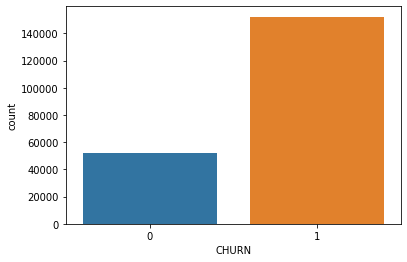

In [ ]:
#Checar para desbalanceamento no target.
import seaborn as sns

sns.countplot(dataframe[target])

#### Métodos de Balanceamento

##### SMOTE (Oversampling)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3) #split = separação entre teste e treino

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote_train, y_smote_train = smote.fit_resample(x_train, y_train)

##### ENN (Undersampling)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3) #split = separação entre teste e treino

from imblearn.under_sampling import RandomUnderSampler

ENN = RandomUnderSampler()
x_enn_train, y_enn_train = ENN.fit_resample(x_train, y_train)


##### SMOTEENN (Oversampling + Undersampling)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3) #split = separação entre teste e treino

from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
x_smoteenn_train, y_smoteenn_train = smoteenn.fit_resample(x_train, y_train)

### Métricas e Matriz de Confusão

#### Definição de métricas 

In [ ]:
balance_dict = {'Sem Balanceamento': ['metricas_no_sampling','x_train', 'y_train'], 
                'Oversampling': ['metricas_smote', 'x_smote_train', 'y_smote_train'],
                'Undersampling': ['metricas_enn', 'x_enn_train', 'y_enn_train'],
                'Oversampling + Undersampling': ['metricas_smoteenn', 'x_smoteenn_train', 'y_smoteenn_train']}

normalize_dict = {'Max Abs Scaler': TestMaxAbsScaler, 
                  'Min Max Scaler': TestMinMaxScaler, 
                  'Standard Scaler': TestStandardScaler}

#função utilizada para verificar a "qualidade" do modelo
def metricas_no_sampling(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_train, y_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))

#função utilizada para verificar a "qualidade" do modelo
def metricas_smote(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_smote_train, y_smote_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))

#função utilizada para verificar a "qualidade" do modelo
def metricas_enn(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_enn_train, y_enn_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))

#função utilizada para verificar a "qualidade" do modelo
def metricas_smoteenn(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_smoteenn_train, y_smoteenn_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))

#### Importação das bibliotecas da matriz de confusão

In [ ]:
# importação das bibliotecas para matriz de confusão 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

### Algoritmos de IA (Classificação)

#### KNN (K-Nearest Neighbors)

O modelo K-Nearest Neighbours foi importado da biblioteca sklearn.neighbours e funciona pela classificação de padrões que prediz o resultado a partir do cálculo da distância entre o novo dado de treinamento inserido ainda não classificado e seus vizinhos dentro de um raio específico


Sem Balanceamento
Acuracidade (treino):  0.8983992387988694
Acuracidade (teste):  0.8514128997502326
Revocação:  0.9217221991292743
Precisão:  0.8840835169447068
F1_score:  0.9025106036587979



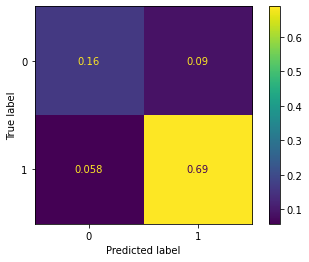


Oversampling
Acuracidade (treino):  0.9099704267004647
Acuracidade (teste):  0.819204335831007
Revocação:  0.8248484981075936
Precisão:  0.9247277543412146
F1_score:  0.8719371885153964



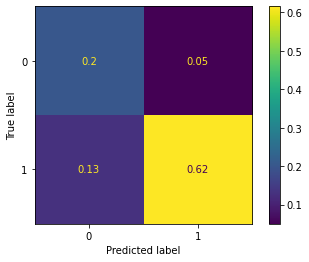


Undersampling
Acuracidade (treino):  0.8769805310706538
Acuracidade (teste):  0.7982761153827318
Revocação:  0.7849657616661927
Precisão:  0.93418037908769
F1_score:  0.8530974713791505



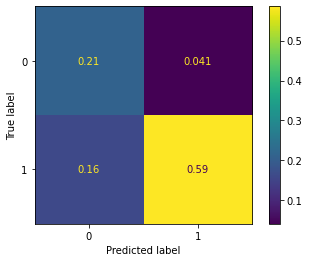


Oversampling + Undersampling
Acuracidade (treino):  0.9893543760779879
Acuracidade (teste):  0.7981291933983055
Revocação:  0.780108950097355
Precisão:  0.9390356305796224
F1_score:  0.8522262852226286



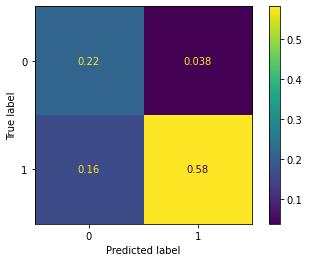

In [ ]:
# modelo de classificação K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

for i in balance_dict:
  print()
  print(i)
  knc = knn.fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = knc.predict(x_test)
  globals()[balance_dict[i][0]](knc)
  
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)
  disp.plot()
  plt.show()

#### Decision Tree

O modelo de classificação de árvore de decisão consiste em um conjunto de escolhas hierárquicas, separando entre nós internos e externos (folhas). Ao utilizar esse modelo, é especificada a profundidade de decisões feitas pela árvore, isto é, quantos níveis de escolhas serão feitos. Para não ocorrer overfitting na classificação, os níveis de decisão não são tão profundos na fase de treino do modelo.


Sem Balanceamento
Acuracidade (treino):  0.8895978507262194
Acuracidade (teste):  0.8902492776335765
Revocação:  0.9514537618412129
Precisão:  0.9061549360336709
F1_score:  0.9282520303512161



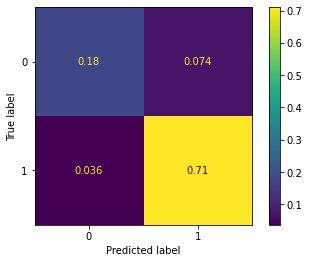


Oversampling
Acuracidade (treino):  0.9050931793644088
Acuracidade (teste):  0.8657622802291983
Revocação:  0.8442101117941762
Precisão:  0.9722348198538675
F1_score:  0.903710816285905



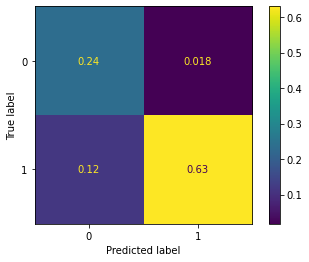


Undersampling
Acuracidade (treino):  0.8854381195595463
Acuracidade (teste):  0.8657622802291983
Revocação:  0.8442101117941762
Precisão:  0.9722348198538675
F1_score:  0.903710816285905



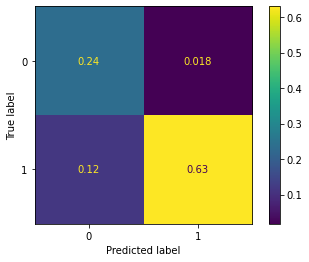


Oversampling + Undersampling
Acuracidade (treino):  0.9595904626911005
Acuracidade (teste):  0.8641298137355731
Revocação:  0.8407097070598788
Precisão:  0.973600202685584
F1_score:  0.902288122659341



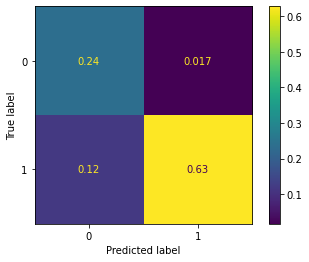

In [ ]:
# modelo de classificação Decision Tree
from sklearn.tree import DecisionTreeClassifier
## instanciação do objeto e treinamento do modelo Decision Tree

for i in balance_dict:
  print()
  print(i)
  dt = DecisionTreeClassifier(max_depth=3).fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = dt.predict(x_test)
  globals()[balance_dict[i][0]](dt)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### Naive Bayes

O modelo Naive Bayes foi   importado da biblioteca sklearn.naive_bayes e funciona tomando como premissa a suposição de independência entre variáveis do problema, realizando uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. Sendo um modelo para a classificação de atributos discretos, o Naive Bayes tem aplicações na análise de crédito, diagnósticos médicos ou busca por falhas em sistemas mecânicos.


Sem Balanceamento
Acuracidade (treino):  0.5972420451683318
Acuracidade (teste):  0.597939827285045
Revocação:  0.46117832374368284
Precisão:  1.0
F1_score:  0.6312416715327374



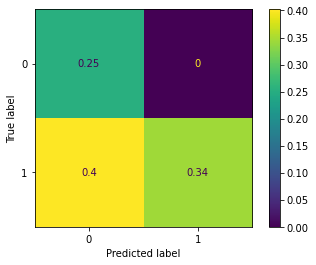


Oversampling
Acuracidade (treino):  0.7314274984743933
Acuracidade (teste):  0.6001273323865027
Revocação:  0.4641099127086569
Precisão:  1.0
F1_score:  0.6339823379107332



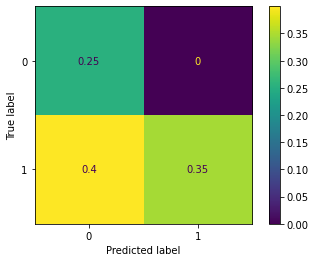


Undersampling
Acuracidade (treino):  0.7302496086992338
Acuracidade (teste):  0.597548035326575
Revocação:  0.46065326303353826
Precisão:  1.0
F1_score:  0.6307496442746948



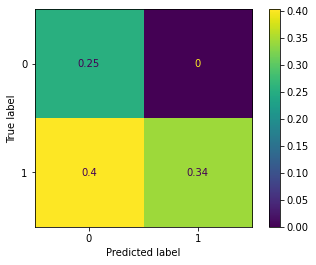


Oversampling + Undersampling
Acuracidade (treino):  0.8045903507661137
Acuracidade (teste):  0.5864146138400509
Revocação:  0.44573278785359555
Precisão:  1.0
F1_score:  0.6166184949230513



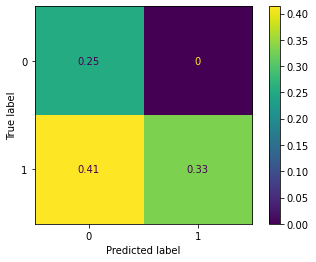

In [ ]:
# modelo de classificação Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

for i in balance_dict:
  print()
  print(i)
  nb = MultinomialNB().fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = nb.predict(x_test)
  globals()[balance_dict[i][0]](nb)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### Random Forest

O modelo de Random Forest foi importado da blibioteca sklearn.ensemble import RandomForestClassifier e funciona como um conjunto de árvores de decisões(decision trees) randômicas, criando uma gama de escolhas hierárquicas. Portanto, o output desse algoritimo vêm da quantidade majoritária da classificação por árvore.


Sem Balanceamento
Acuracidade (treino):  0.8320949822293119
Acuracidade (teste):  0.833635339634654
Revocação:  0.9996499595265702
Precisão:  0.8178742750769671
F1_score:  0.899672169880977



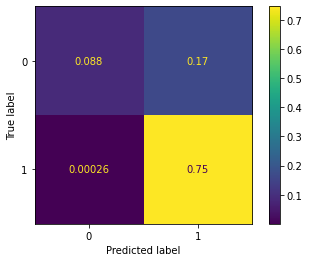


Oversampling
Acuracidade (treino):  0.9047223395765854
Acuracidade (teste):  0.8651092936317482
Revocação:  0.842613052134153
Precisão:  0.9729941390460792
F1_score:  0.9031221788423435



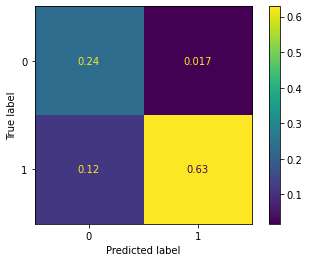


Undersampling
Acuracidade (treino):  0.8860971524288107
Acuracidade (teste):  0.8578774670649885
Revocação:  0.827670699424621
Precisão:  0.9785572023486201
F1_score:  0.8968116629133578



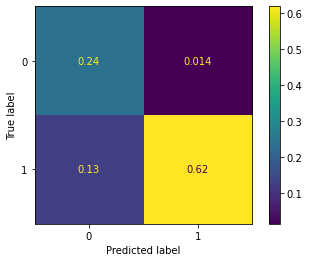


Oversampling + Undersampling
Acuracidade (treino):  0.9534063568443712
Acuracidade (teste):  0.8415201527988638
Revocação:  0.8060994552495132
Precisão:  0.9775808548459844
F1_score:  0.8835971223021583



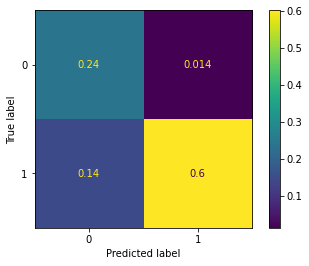

In [ ]:
# modelo de classificação Random Forest
from sklearn.ensemble import RandomForestClassifier

for i in balance_dict:
  print()
  print(i)
  rf = RandomForestClassifier(max_depth=2, random_state=23).fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = rf.predict(x_test)
  globals()[balance_dict[i][0]](rf)
  
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### Regressão Logística

O modelo de regressão logística foi importado da biblioteca sklearn.linear_model e  modela a probabilidade de um evento (de duas alternativas) ocorrer fazendo com que as probabilidades logarítmicas (o logaritmo das chances ) para o evento sejam uma combinação linear de uma ou mais variáveis independentes ("preditores"). Na análise de regressão, a regressão logística (ou regressão logit ) está estimando os parâmetros de um modelo logístico (os coeficientes na combinação linear). Formalmente, na regressão logística binária existe uma única variável dependente binária, codificada por uma variável indicadora , onde os dois valores são rotulados como "0" e "1", enquanto as variáveis independentes podem ser cada uma uma variável binária (duas classes, codificadas por uma variável indicadora) ou uma variável contínua(qualquer valor real). A probabilidade correspondente do valor rotulado "1" pode variar entre 0 (certamente o valor "0") e 1 (certamente o valor "1"), daí a rotulagem; a função que converte log-odds em probabilidade é a função logística, daí o nome.para a escala log-odds é chamado de logit , de logistic unit , sendo esses, nomes alternativos.


Sem Balanceamento
Acuracidade (treino):  0.8446394089497103
Acuracidade (teste):  0.8456829423576081
Revocação:  0.9642739941805771
Precisão:  0.849314012640666
F1_score:  0.9031504533579222



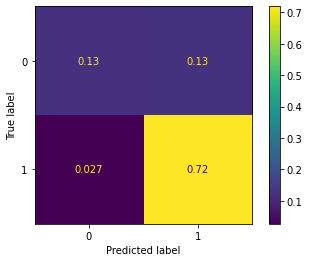


Oversampling
Acuracidade (treino):  0.820865605783223
Acuracidade (teste):  0.7344140261521133
Revocação:  0.6440744711107221
Precisão:  1.0
F1_score:  0.7835100932813477



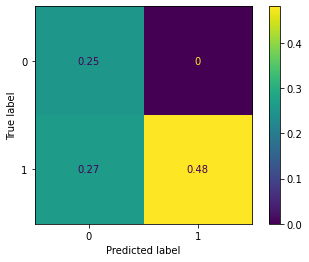


Undersampling
Acuracidade (treino):  0.8230222148996348
Acuracidade (teste):  0.7376299851445549
Revocação:  0.6483843444398258
Precisão:  1.0
F1_score:  0.7866907334165052



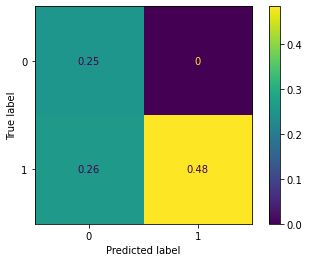


Oversampling + Undersampling
Acuracidade (treino):  0.9225908572875776
Acuracidade (teste):  0.7340385588585794
Revocação:  0.6435712879301669
Precisão:  1.0
F1_score:  0.7831376620610707



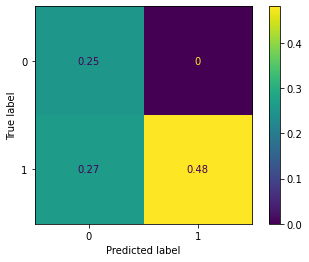

In [ ]:
# modelo de classificação de Regressão Logística
from sklearn.linear_model import LogisticRegression

for i in balance_dict:
  print()
  print(i)
  rl = LogisticRegression().fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = rl.predict(x_test)
  globals()[balance_dict[i][0]](rl)
  
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### AdaBoost

Adapting Boosting é um modelo realizado em fases. Primeiramente, um modelo considerado “fraco” em questões de predição é utilizado e, com base nos resultados obtidos, ele aprende os padrões de erros progressivamente para realizar novos treinamentos em novos modelos até chegar em um resultado que o algoritmo acha satisfatório. A partir disso, é criada uma adaptação que, na maioria dos casos, não terá underfitting nos resultados classificadores e alcançará um resultado personalizado após várias melhorias.


Sem Balanceamento
Acuracidade (treino):  0.9354378305767778
Acuracidade (teste):  0.9336728863640074
Revocação:  0.9685619899800915
Precisão:  0.9440061409868225
F1_score:  0.9561264267280011



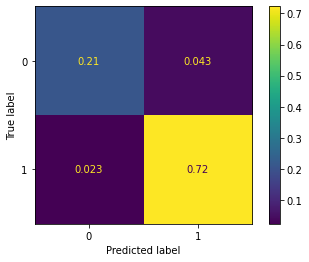


Oversampling
Acuracidade (treino):  0.9320048819415105
Acuracidade (teste):  0.9151443916613612
Revocação:  0.9191625281673194
Precisão:  0.9654617735597583
F1_score:  0.941743438011342



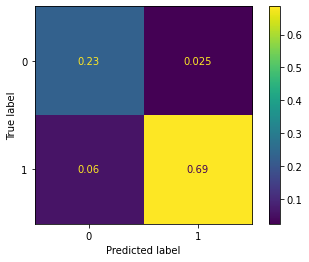


Undersampling
Acuracidade (treino):  0.9197490183156218
Acuracidade (teste):  0.9197642718383205
Revocação:  0.9226629329016167
Precisão:  0.9683151949304312
F1_score:  0.9449379922252221



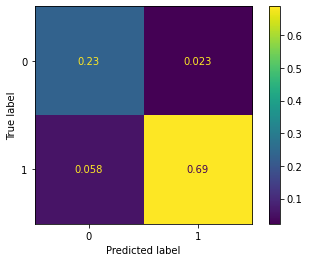


Oversampling + Undersampling
Acuracidade (treino):  0.9781435988350007
Acuracidade (teste):  0.9032437109228333
Revocação:  0.8930407578376249
Precisão:  0.9752018729991877
F1_score:  0.9323146847556728



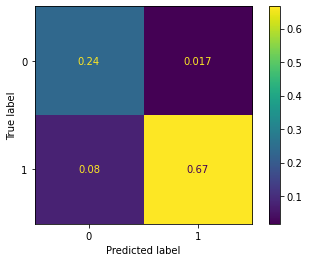

In [ ]:
# modelo de classificação Ada Boost
from sklearn.ensemble import AdaBoostClassifier

for i in balance_dict:
  print()
  print(i)
  ab = AdaBoostClassifier().fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = ab.predict(x_test)
  globals()[balance_dict[i][0]](ab)
  
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### Extra Trees

Extra Trees é um modelo bastante semelhante ao Random Forest, com a diferença de adicionar um fator de aleatoriedade a mais na separação de dados. Após a seleção aleatória das variáveis candidatas para o nó inicial, os dados existentes em cada uma destas variáveis serão separados (split dos dados) também de maneira aleatória. Em seguida, os cálculos necessários para a otimização da árvore podem começar.


Sem Balanceamento
Acuracidade (treino):  1.0
Acuracidade (teste):  0.9158300275886837
Revocação:  0.9775317771117286
Precisão:  0.9154084120382701
F1_score:  0.9454506982649176



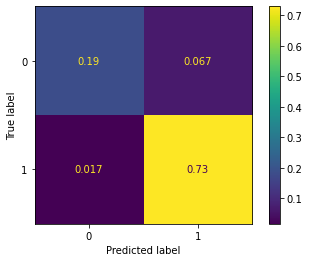


Oversampling
Acuracidade (treino):  1.0
Acuracidade (teste):  0.9154055863003412
Revocação:  0.9454593187337286
Precisão:  0.9414225029953164
F1_score:  0.9434365926605103



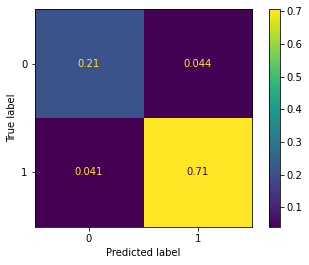


Undersampling
Acuracidade (treino):  1.0
Acuracidade (teste):  0.9000930505901367
Revocação:  0.9034325843925703
Precisão:  0.9603265040347899
F1_score:  0.9310111599594183



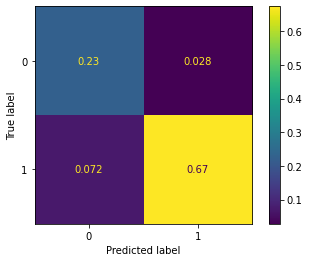


Oversampling + Undersampling
Acuracidade (treino):  1.0
Acuracidade (teste):  0.9088267463310316
Revocação:  0.9269728062307204
Precisão:  0.9496391590837778
F1_score:  0.9381690967263389



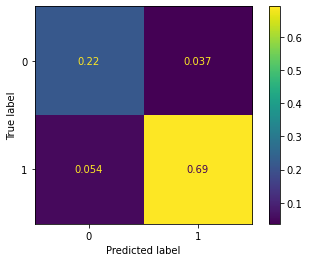

In [ ]:
# modelo de classificação Exntra Tress
from sklearn.ensemble import ExtraTreesClassifier

# instanciação do objeto e treinamento do modelo Extra Trees
for i in balance_dict:
  print()
  print(i)
  et = ExtraTreesClassifier().fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  y_pred = et.predict(x_test)
  globals()[balance_dict[i][0]](et)
    
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### XGBoost


Sem Balanceamento
Acuracidade (treino):  0.9370609800464557
Acuracidade (teste):  0.9356971448161027
Revocação:  0.9722155374215143
Precisão:  0.9433429566103422
F1_score:  0.9575616535763922



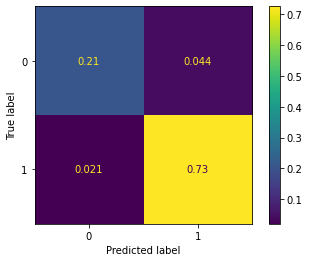


Oversampling
Acuracidade (treino):  0.9364408768718021
Acuracidade (teste):  0.9184582986434203
Revocação:  0.9224441576057232
Precisão:  0.9667537946530931
F1_score:  0.9440793524624118



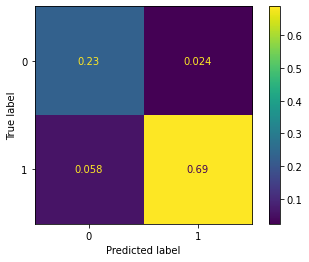


Undersampling
Acuracidade (treino):  0.9220419035066041
Acuracidade (teste):  0.9203193104461531
Revocação:  0.9198188540550001
Precisão:  0.9718908922792417
F1_score:  0.945138194202475



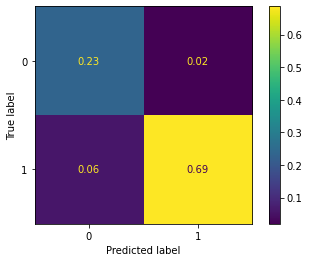


Oversampling + Undersampling
Acuracidade (treino):  0.9792706090920603
Acuracidade (teste):  0.9035865288864946
Revocação:  0.891881248769389
Precisão:  0.9768996669142843
F1_score:  0.9324565416285452



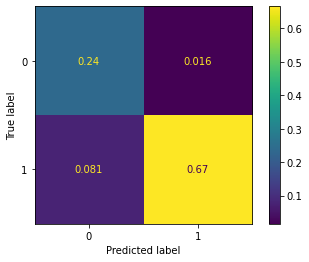

In [ ]:
# modelo de classificação XGBOOST
import xgboost as xgb
xgboost = xgb.XGBClassifier()
# instanciação do objeto e treinamento do modelo XGBOOST

for i in balance_dict:
  print()
  print(i)
  xgmodel = xgboost.fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  y_pred = xgboost.predict(x_test)
  globals()[balance_dict[i][0]](xgmodel)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### CatBoost


Sem Balanceamento
Acuracidade (treino):  0.9481011949738337
Acuracidade (teste):  0.9379499485773054
Revocação:  0.9705309676431337
Precisão:  0.947582023239918
F1_score:  0.9589192110240475



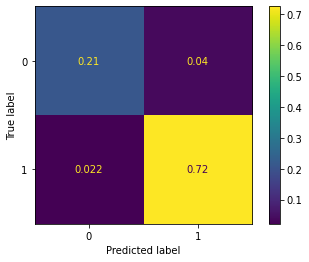


Oversampling
Acuracidade (treino):  0.9612965310050228
Acuracidade (teste):  0.9363991054083615
Revocação:  0.9634645255857709
Precisão:  0.9518858748513995
F1_score:  0.9576402026659708



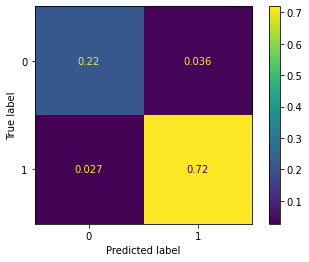


Undersampling
Acuracidade (treino):  0.942403273196584
Acuracidade (teste):  0.9226374128671009
Revocação:  0.9224222800761338
Precisão:  0.972483623950549
F1_score:  0.9467916690057823



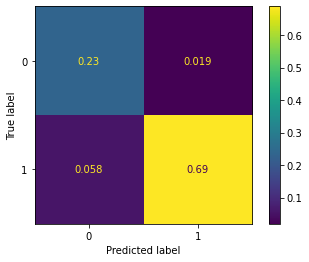


Oversampling + Undersampling
Acuracidade (treino):  0.9888375332404711
Acuracidade (teste):  0.9190949605759342
Revocação:  0.9190750180489619
Precisão:  0.9709478355328541
F1_score:  0.9442995864053227



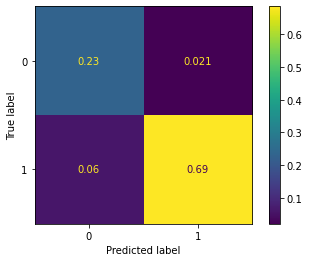

In [ ]:
from catboost import CatBoostClassifier

model_cb = CatBoostClassifier(logging_level='Silent')

for i in balance_dict:
  print()
  print(i)
  cbmodel = model_cb.fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  y_pred = cbmodel.predict(x_test)
  globals()[balance_dict[i][0]](cbmodel)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### Bagging Classifier


Sem Balanceamento
Acuracidade (treino):  0.99583718131699
Acuracidade (teste):  0.9288897595376855
Revocação:  0.9531164540900041
Precisão:  0.9516590576465191
F1_score:  0.9523871983210913



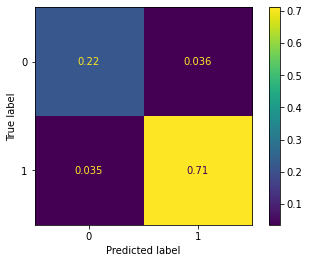


Oversampling
Acuracidade (treino):  0.9966389710369431
Acuracidade (teste):  0.9229802308307622
Revocação:  0.939202345271172
Precisão:  0.9567853083420624
F1_score:  0.9479122965841594



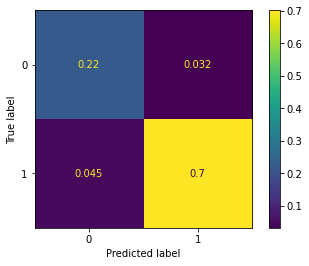


Undersampling
Acuracidade (treino):  0.9938078369992037
Acuracidade (teste):  0.9053332680346736
Revocação:  0.8976787941105691
Precisão:  0.9733833088200408
F1_score:  0.9339995219830873



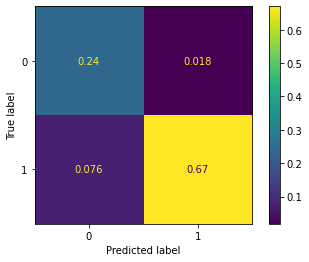


Oversampling + Undersampling
Acuracidade (treino):  0.9985690768646321
Acuracidade (teste):  0.9064759945802112
Revocação:  0.8983351199982498
Precisão:  0.9743261199696279
F1_score:  0.9347887949187847



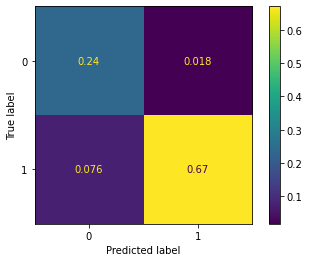

In [ ]:
# modelo de classificação BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bgclass = BaggingClassifier()

for i in balance_dict:
  print()
  print(i)
  bgmodel = bgclass.fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  y_pred = bgmodel.predict(x_test)
  globals()[balance_dict[i][0]](bgmodel)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### SGD Classifier


Sem Balanceamento
Acuracidade (treino):  0.8090980326309014
Acuracidade (teste):  0.8093932122043195
Revocação:  0.8714695136625172
Precisão:  0.8728826558562507
F1_score:  0.8721755123489227



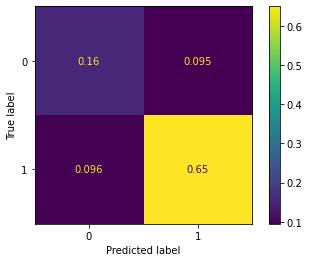


Oversampling
Acuracidade (treino):  0.798864009763883
Acuracidade (teste):  0.7004097490899
Revocação:  0.5985035769760879
Precisão:  1.0
F1_score:  0.748829825089645



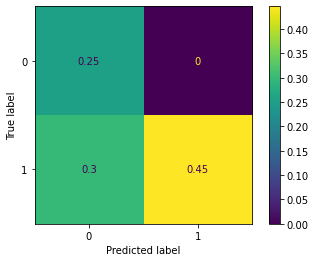


Undersampling
Acuracidade (treino):  0.7883131504517121
Acuracidade (teste):  0.684297304797819
Revocação:  0.5769104552713907
Precisão:  1.0
F1_score:  0.7316971656099558



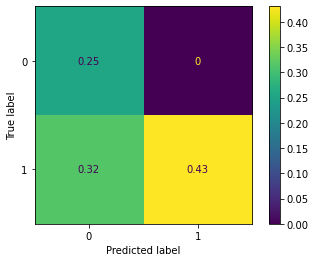


Oversampling + Undersampling
Acuracidade (treino):  0.7464986703811574
Acuracidade (teste):  0.8330476516969489
Revocação:  0.9780130827626944
Precisão:  0.8289878722694062
F1_score:  0.8973553470166107



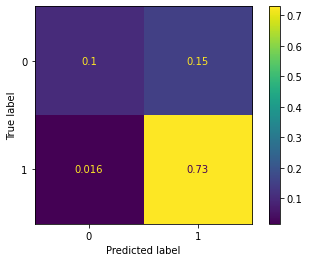

In [ ]:
# modelo de classificação BaggingClassifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

for i in balance_dict:
  print()
  print(i)
  sgdcmodel = sgdc.fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  y_pred = sgdcmodel.predict(x_test)
  globals()[balance_dict[i][0]](sgdcmodel)

  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

#### SVM (Support Vector Machine)

O modelo SVM foi importado da biblioteca sklearn.svm import SVC e tem a funcionalidade de traçar uma reta que separa os tipos de classificação. A partir de um vetor y = features e x = classificação


Sem Balanceamento
Acuracidade (treino):  0.7452215039319396
Acuracidade (teste):  0.7461677849062148
Revocação:  0.9999781224704106
Precisão:  0.7461799660441426
F1_score:  0.8546346935913616



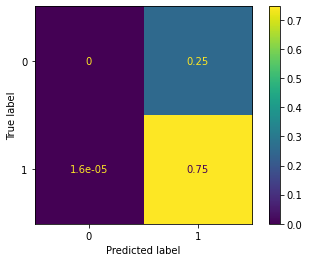


Oversampling


In [ ]:
# modelo de classificação Support Vector Machine
from sklearn.svm import SVC

for i in balance_dict:
  print()
  print(i)
  svm = SVC().fit(globals()[balance_dict[i][1]], globals()[balance_dict[i][2]].squeeze())
  # predição do modelo
  y_pred = svm.predict(x_test)
  globals()[balance_dict[i][0]](svm)
  
  print()
  
  # definição das variáveis utilizadas na matriz de confusão 
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  # matriz
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
  disp.plot()
  plt.show()

# 5. Avaliação

A função dessa seção é explicitar os resultados obtidos a partir do algorítimos de I.A. criados acima.

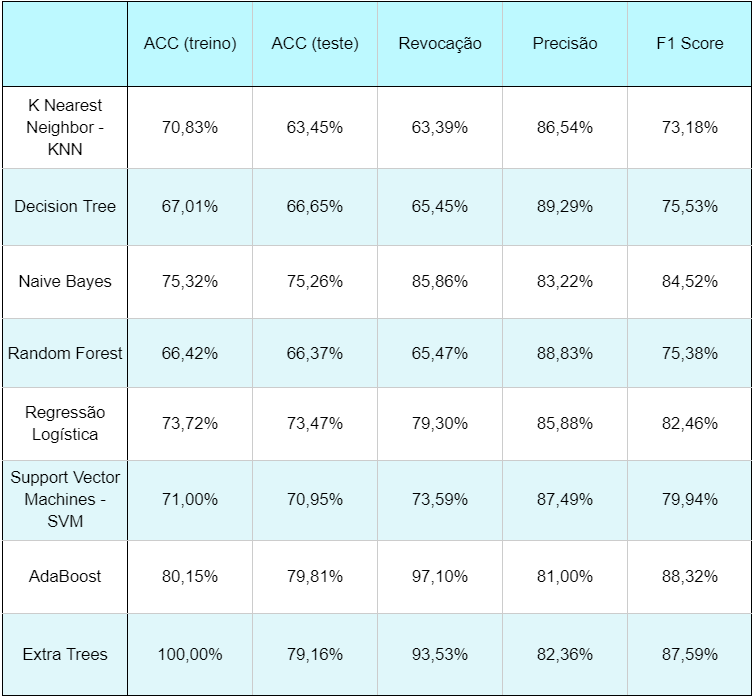

# 6. Implantação